In [1]:
import mne
from mne.preprocessing import ICA

In [5]:
# Load your raw EDF file
file_path = '/home/technoshr370/Downloads/ds003751/sub-mit097/eeg/sub-mit097_task-Emotion_eeg.edf'
raw = mne.io.read_raw_edf(file_path, preload=True)
raw.describe()

Extracting EDF parameters from /home/technoshr370/Downloads/ds003751/sub-mit097/eeg/sub-mit097_task-Emotion_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   363.996 secs...
<RawEDF | sub-mit097_task-Emotion_eeg.edf, 108 x 91000 (364.0 s), ~75.1 MB, data loaded>
 ch  name    type  unit        min         Q1     median         Q3        max
  0  E1      EEG   µV     -5914.37      -6.41      -0.09       6.23     264.88
  1  E2      EEG   µV     -5914.37      -8.39      -0.99       6.05     171.20
  2  E3      EEG   µV     -5914.37      -5.69      -0.63       4.42      84.38
  3  E4      EEG   µV     -5914.37      -5.14      -0.45       4.06      76.62
  4  E5      EEG   µV     -5914.37      -3.70      -0.09       3.52      47.20
  5  E6      EEG   µV     -5914.37      -3.34       0.27       3.52      30.77
  6  E7      EEG   µV     -5914.37      -3.34       0.27       3.70      64.35
  7  E8      EEG   µV

Using matplotlib as 2D backend.


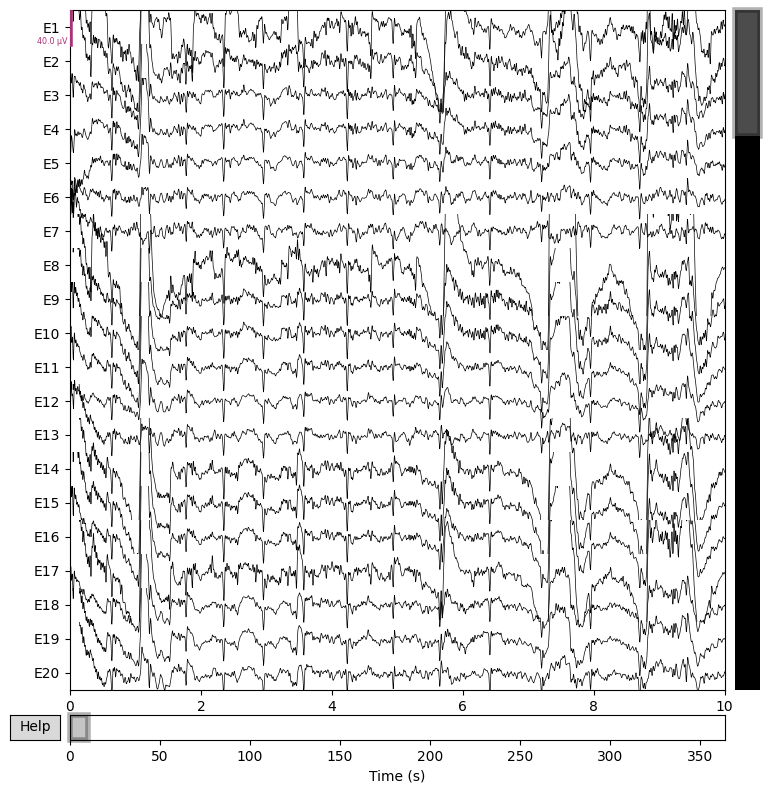

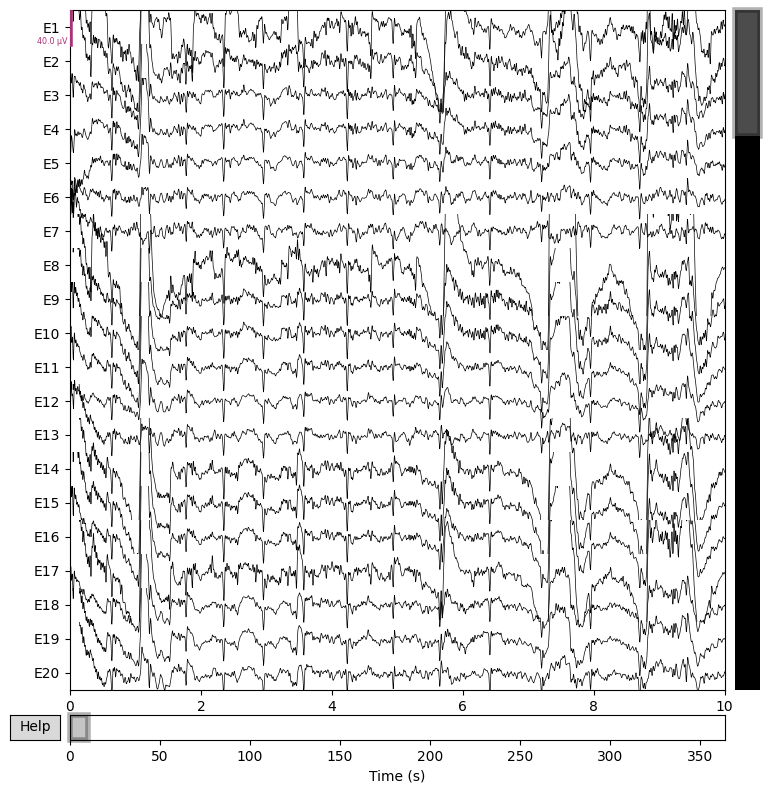

In [6]:
raw.plot()

In [2]:
import cupy as cp

In [3]:
data_gpu = cp.asarray(raw.get_data())

NameError: name 'raw' is not defined

In [9]:
# Convert back to NumPy array for further processing in MNE
data_cpu = cp.asnumpy(data_gpu)
raw.load_data()  # Ensure data is loaded as modifying raw._data directly can lead to issues
raw._data = data_cpu


In [10]:

# Proceed with CPU-based processing
raw.filter(l_freq=1.0, h_freq=40.0)
if raw.info['sfreq'] > 256:
    raw.resample(sfreq=256)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s


In [13]:
import mne
from mne.preprocessing import ICA, create_eog_epochs, corrmap

In [4]:
file_path = '/home/technoshr370/Downloads/Dataset/ds003751/sub-mit004/eeg/sub-mit004_task-Emotion_eeg.set'

In [5]:
raw = mne.io.read_raw_eeglab(file_path,preload=True)

Reading /home/technoshr370/Downloads/Dataset/ds003751/sub-mit004/eeg/sub-mit004_task-Emotion_eeg.fdt
Reading 0 ... 430526  =      0.000 ...  1722.104 secs...


/tmp/ipykernel_16892/2696636999.py:1: RuntimeWarning: Unknown types found, setting as type EEG:
pns: ['ECG', 'EMG', 'EMG_2']
  raw = mne.io.read_raw_eeglab(file_path,preload=True)
/tmp/ipykernel_16892/2696636999.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path,preload=True)


In [6]:
raw.describe()

<RawEEGLAB | sub-mit004_task-Emotion_eeg.fdt, 132 x 430527 (1722.1 s), ~433.7 MB, data loaded>
 ch  name   type  unit        min         Q1     median         Q3        max
  0  E1     EEG   µV    -36045.88  -28509.35  -25631.13  -21535.87    4210.24
  1  E2     EEG   µV    -33905.23  -24791.28  -21410.67  -18958.17    3227.60
  2  E3     EEG   µV    -22029.71   -9488.48   -9123.91   -8704.81    2899.60
  3  E4     EEG   µV    -16878.89   -3020.06   -2470.10   -1750.10    6929.14
  4  E5     EEG   µV    -19051.61   -2871.71   -2431.59   -2178.82    5350.61
  5  E6     EEG   µV    -14897.33    -216.14     440.41     765.87    9103.66
  6  E7     EEG   µV    -19487.11   -3080.04   -2985.81   -2901.76    6795.64
  7  E8     EEG   µV    -54774.15  -38568.89  -31626.72  -25866.24    3668.66
  8  E9     EEG   µV    -26194.90  -14707.29   -9885.16   -8021.50    3186.93
  9  E10    EEG   µV    -22696.12  -10937.86  -10521.26   -9473.21    2848.93
 10  E11    EEG   µV    -18568.88   -2506.05   

In [7]:

# Re-reference the data to the average of all electrodes
raw.set_eeg_reference('average', projection=True)  # set to 'average' for average referencing
raw.apply_proj()

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


<RawEEGLAB | sub-mit004_task-Emotion_eeg.fdt, 132 x 430527 (1722.1 s), ~433.7 MB, data loaded>

In [11]:
# Segmenting the data around emotional events
events = mne.events_from_annotations(raw)


Used Annotations descriptions: [np.str_('IBEG'), np.str_('IEND'), np.str_('arsl'), np.str_('base'), np.str_('bend'), np.str_('boundary'), np.str_('cate'), np.str_('clic'), np.str_('dmns'), np.str_('fixL'), np.str_('fmrt'), np.str_('lkng'), np.str_('puse'), np.str_('qdon'), np.str_('quiz'), np.str_('relv'), np.str_('rsrt'), np.str_('stm'), np.str_('stop'), np.str_('trno'), np.str_('vlnc')]


## Before ICA

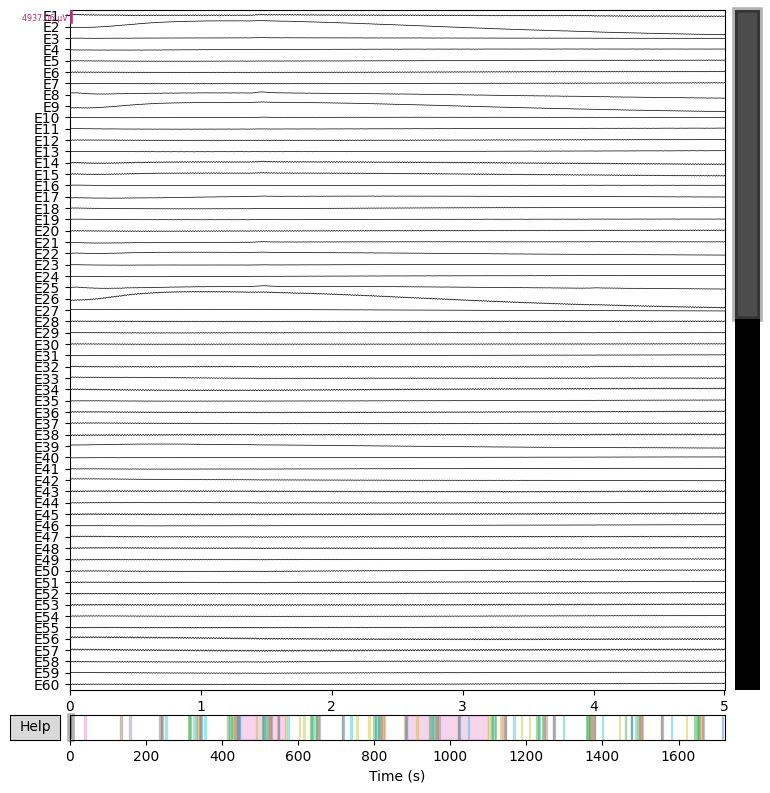

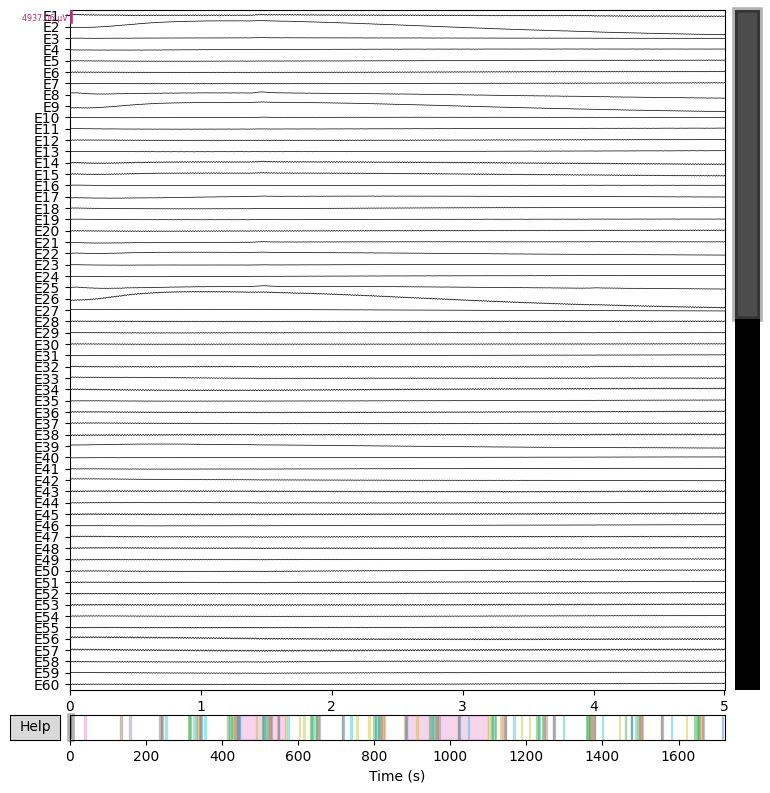

In [23]:
raw.plot(duration=5, n_channels=60, scalings='auto')

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/home/technoshr370/parthpython/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


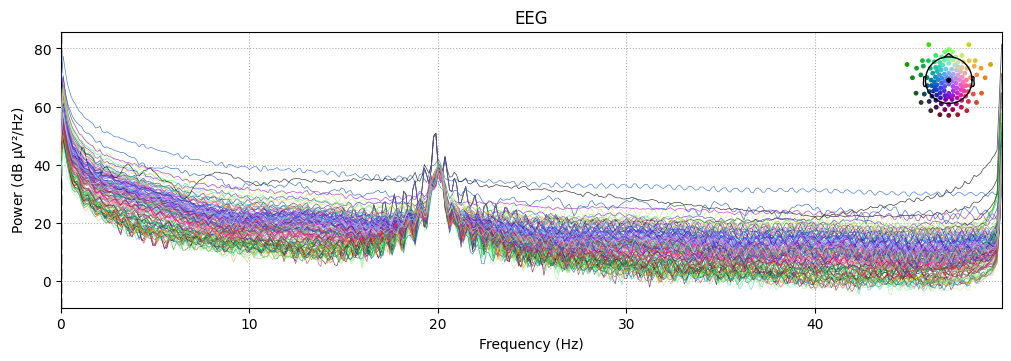

In [24]:
raw.plot_psd(fmax=50)  # Limiting frequency to 50 Hz for visualization

In [12]:
event_id = {'clic': 1}  # update based on your specific annotations and needs


In [26]:
print(raw.info)

<Info | 9 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 132 EEG
 custom_ref_applied: False
 dig: 135 items (3 Cardinal, 132 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 132
 projs: Average EEG reference: on
 sfreq: 250.0 Hz
>


In [27]:
non_eeg_chs = ['ECG', 'EMG']  # Adjust these based on how they are labeled in your data

In [28]:
eeg_picks = mne.pick_types(raw.info, meg=False, eeg=True, exclude=non_eeg_chs)

In [30]:
print(eeg_picks)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 131]


In [31]:
raw.set_eeg_reference(ref_channels='average', projection=True, ch_type='eeg')

/tmp/ipykernel_16892/27832400.py:1: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(ref_channels='average', projection=True, ch_type='eeg')


<RawEEGLAB | sub-mit004_task-Emotion_eeg.fdt, 132 x 430527 (1722.1 s), ~433.7 MB, data loaded>

In [32]:
raw.apply_proj()

Projections have already been applied. Setting proj attribute to True.


<RawEEGLAB | sub-mit004_task-Emotion_eeg.fdt, 132 x 430527 (1722.1 s), ~433.7 MB, data loaded>

In [33]:
raw.filter(1., 40., method='iir', iir_params={'order': 5, 'ftype': 'butter'})

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 20 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB



<RawEEGLAB | sub-mit004_task-Emotion_eeg.fdt, 132 x 430527 (1722.1 s), ~433.7 MB, data loaded>

In [34]:
events, event_id = mne.events_from_annotations(raw)

Used Annotations descriptions: [np.str_('IBEG'), np.str_('IEND'), np.str_('arsl'), np.str_('base'), np.str_('bend'), np.str_('boundary'), np.str_('cate'), np.str_('clic'), np.str_('dmns'), np.str_('fixL'), np.str_('fmrt'), np.str_('lkng'), np.str_('puse'), np.str_('qdon'), np.str_('quiz'), np.str_('relv'), np.str_('rsrt'), np.str_('stm'), np.str_('stop'), np.str_('trno'), np.str_('vlnc')]


In [37]:
event_id = {'clic': 1}  # Update based on your specific annotations and needs

In [38]:
tmin, tmax = -6, 1  # 6s before and 1s after the event

In [39]:
epochs = mne.Epochs(raw, events=events, event_id=event_id, tmin=tmin, tmax=tmax,
                    picks=eeg_picks, baseline=None, preload=True)


Not setting metadata
2 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 2 events and 1751 original time points ...
0 bad epochs dropped


In [40]:
ica = ICA(n_components=15, random_state=97)

In [41]:
ica.fit(epochs)

Fitting ICA to data using 130 channels (please be patient, this may take a while)
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by number: 15 components
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.8s.


<ICA | epochs decomposition, method: fastica (fit in 65 iterations on 3502 samples), 15 ICA components (130 PCA components available), channel types: eeg, no sources marked for exclusion>

In [45]:
import mne
from mne.preprocessing import ICA, create_eog_epochs  # This is the correct import

In [46]:
# Assuming 'E129' is an EOG channel
eog_epochs = create_eog_epochs(raw, ch_name='E129', tmin=-0.5, tmax=0.5)


Using EOG channel: E129
EOG channel index for this subject is: [128]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel E129 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 10 significant peaks
Number of EOG events detected: 10
Not setting metadata
10 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 10 events and 25

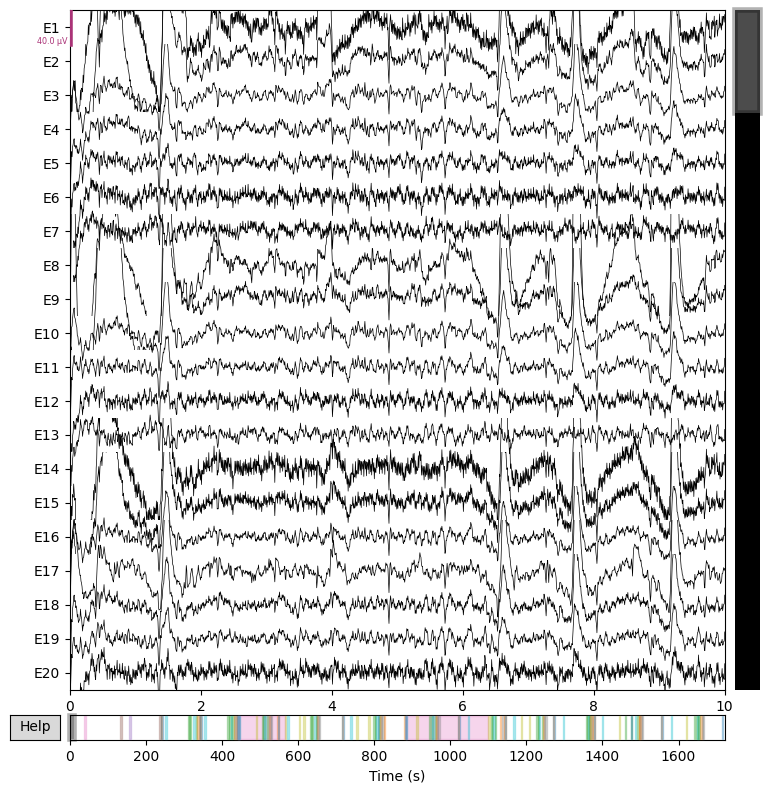

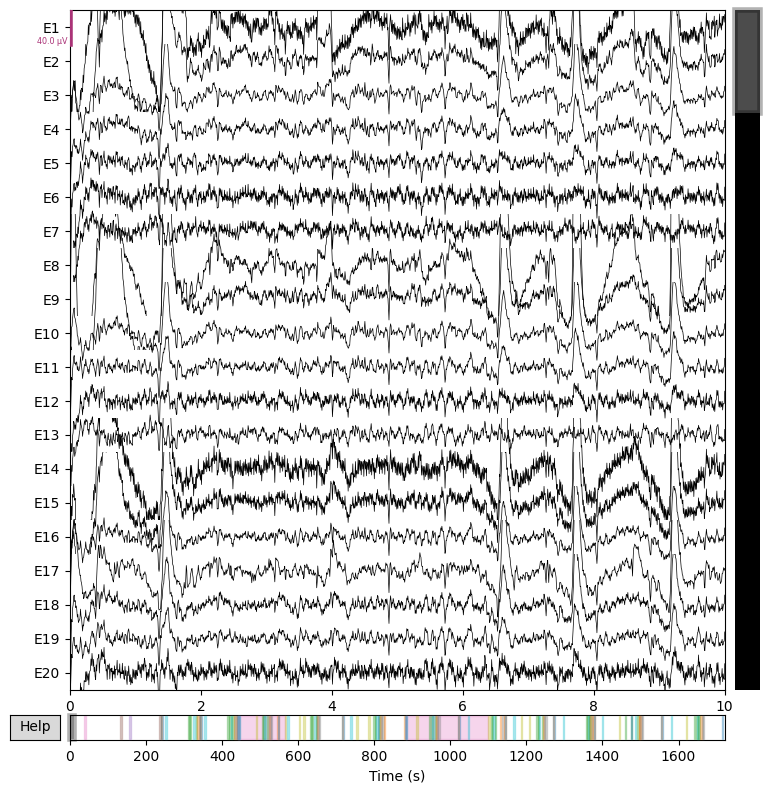

In [47]:
raw.plot()

In [52]:
print(raw.info['ch_names'])  # List all channel names
print(raw.get_channel_types())  # Show the type assigned to each channel


['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39', 'E40', 'E41', 'E42', 'E43', 'E44', 'E45', 'E46', 'E47', 'E48', 'E49', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56', 'E57', 'E58', 'E59', 'E60', 'E61', 'E62', 'E63', 'E64', 'E65', 'E66', 'E67', 'E68', 'E69', 'E70', 'E71', 'E72', 'E73', 'E74', 'E75', 'E76', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124', 'E125', 'E126', 'E127', 'E128', 'E129', 'ECG', 'EMG', 'EMG_2']
['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'e

/home/technoshr370/parthpython/lib/python3.12/site-packages/mne/viz/topomap.py:710: RuntimeWarning: invalid value encountered in divide
  slopes = diffs[:, 1] / diffs[:, 0]
/home/technoshr370/parthpython/lib/python3.12/site-packages/mne/viz/topomap.py:710: RuntimeWarning: invalid value encountered in divide
  slopes = diffs[:, 1] / diffs[:, 0]
/home/technoshr370/parthpython/lib/python3.12/site-packages/mne/viz/topomap.py:710: RuntimeWarning: invalid value encountered in divide
  slopes = diffs[:, 1] / diffs[:, 0]
/home/technoshr370/parthpython/lib/python3.12/site-packages/mne/viz/topomap.py:710: RuntimeWarning: invalid value encountered in divide
  slopes = diffs[:, 1] / diffs[:, 0]
/home/technoshr370/parthpython/lib/python3.12/site-packages/mne/viz/topomap.py:710: RuntimeWarning: invalid value encountered in divide
  slopes = diffs[:, 1] / diffs[:, 0]
/home/technoshr370/parthpython/lib/python3.12/site-packages/mne/viz/topomap.py:710: RuntimeWarning: invalid value encountered in divide

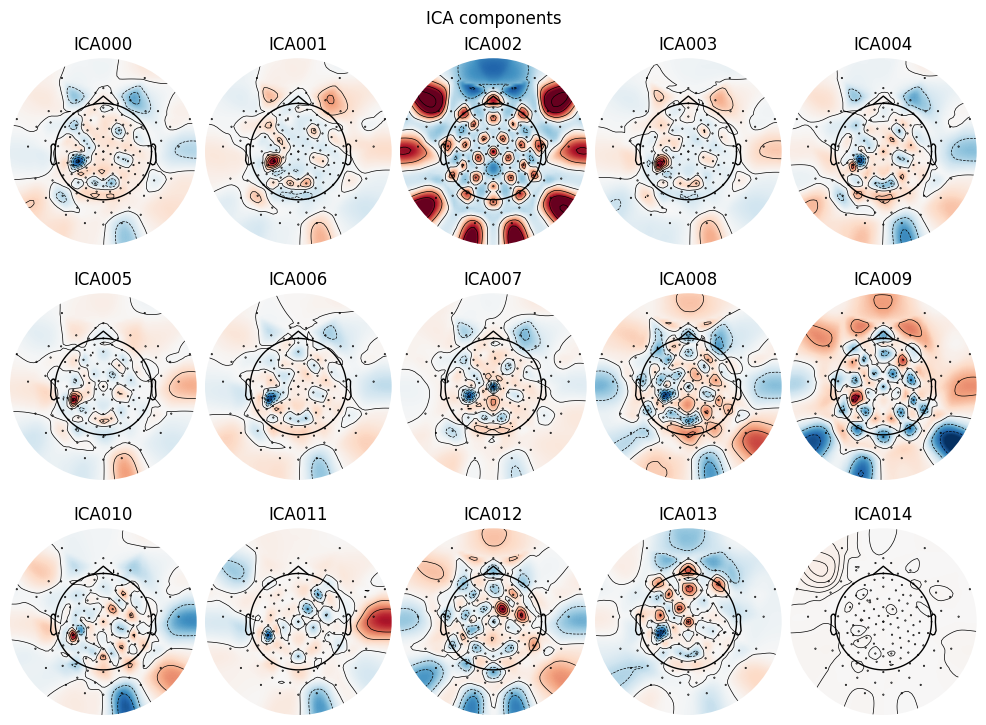

NameError: name 'scores' is not defined

In [50]:
ica.plot_components()
ica.plot_scores(scores)

In [53]:
ica.exclude = [0, 1]  # Update this list based on your visual inspection

In [54]:
raw_clean = ica.apply(raw)

Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 130 PCA components


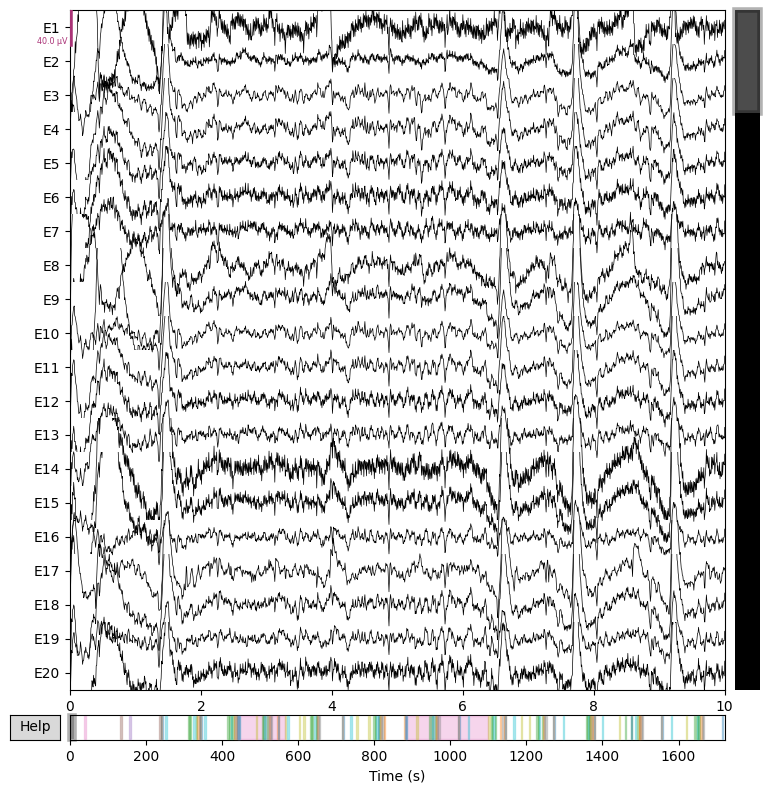

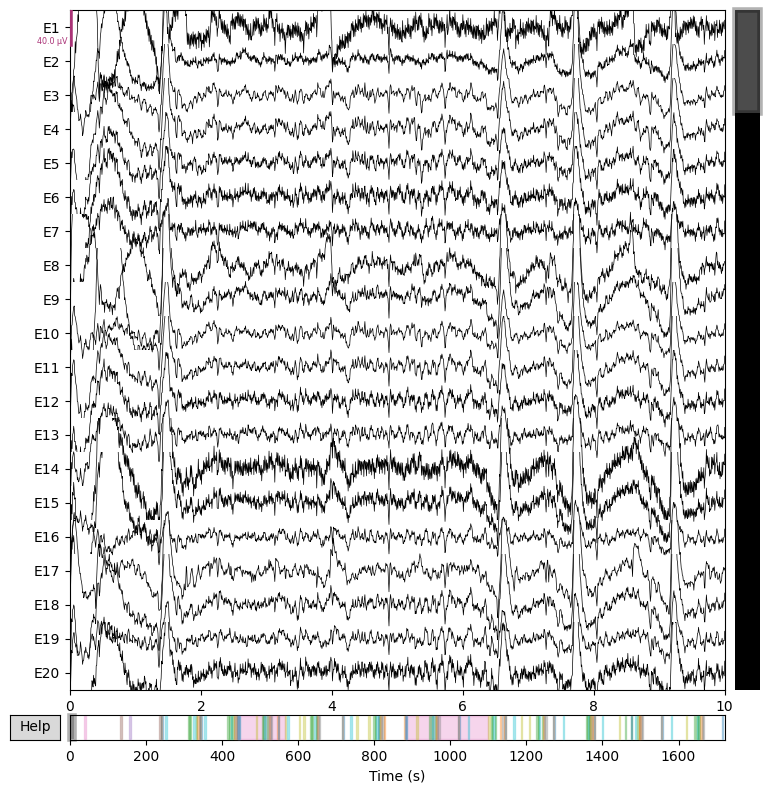

In [55]:
raw_clean.plot()

In [56]:
# Apply filters
raw.filter(l_freq=1.0, h_freq=None)  # High-pass filter
raw.notch_filter(freqs=50)  # Notch filter at 50 Hz, adjust according to your local power line frequency

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.6s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.5s


<RawEEGLAB | sub-mit004_task-Emotion_eeg.fdt, 132 x 430527 (1722.1 s), ~433.7 MB, data loaded>

In [57]:
# Identify bad channels (example names, adjust according to your dataset)
raw.info['bads'] += ['E2', 'E19']  # Mark bad channels

In [59]:
import cupy as cp

In [60]:
data_np = raw.get_data()

In [61]:
data_cp = cp.asarray(data_np)